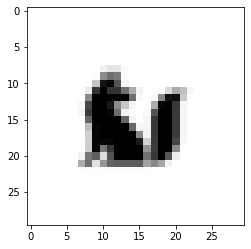

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# img_path = 'test2.png'
# img = cv2.imread(img_path, 0)
# img = img/255.0

# plt.imshow(img, cmap='Greys_r')
# plt.show()
# size_h = img.shape[0]
# size_v = img.shape[1]

########################
USE_OR = False
USE_XOR = False
USE_

In [47]:
class ImageObject:
    
    def __init__(self, size_h, size_v, zero_p):
        self.size_h = size_h
        self.size_v = size_v
        self.img = (np.random.random((size_h,size_v)) > (zero_p/100.0)).astype(int)
        self.error = 0
        
    def show(self):
        plt.imshow(self.img,cmap='Greys_r')
        
    def set_error(self,cvimage):
        self.error = sum(sum(abs(cvimage-self.img)))
        
    def get_fitness(self):
        return self.fitness

In [86]:
def create_new_population(size, size_h, size_v, zero_p, cvimage):
    population = []
    for i in range(size):
        img = ImageObject(size_h,size_v,zero_p)
        img.set_error(cvimage)
        population.append(img)
    return population

In [ ]:
def crossover(img1, img2):
    #OR
    #AND
    #XOR
    

In [ ]:
def mutation(img):
    #Random imgsize%10 bit change
    

In [ ]:
def select_candidates(population, size):
    population.sort(key = lambda x: x.error, reverse=False)
    return population[0:size]

In [ ]:
def next_generation(population, size, mutation_p, cvimage):
    new_population = population
    while(len(new_population)<size):
        if (random.randint (1,100) > mutation_p):
            # do crossover 
            img1 = random.choice(new_population)
            img2 = random.choice(new_population)
            new_img = crossover(img1, img2)
            new_img.set_error(cvimage)
            new_population.append(new_img)
        
        else:
            # do mutation
            img = random.choice(new_population)
            new_img = mutation(img)
            new_img.set_error(cvimage)
            new_population.append(new_img)
            
    return new_population

In [ ]:
def controller():
    
    img_path = 'test2.png'
    orig_img = cv2.imread(img_path, 0)
    orig_img = orig_img/255.0
    
    size_h = orig_img.shape[0]
    size_v = orig_img.shape[1]
    
    population_size = 100
    intermidiate_size = 200
    zero_p = 10
    mutation_p = 10
    no_of_generations = 100
    
    for i in range(no_of_generations):
        
        population = create_new_population(population_size, size_h, size_v, zero_p, orig_img)
        next_gen = next_generation(population, intermidiate_size, mutation_p, orig_img)
        population = select_candidates(next_gen, population_size)
        

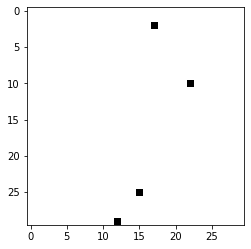

In [107]:
#img1 = ImageObject(size_h,size_v,0.5)
img1.show()

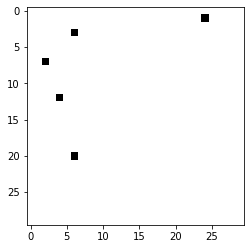

In [108]:
#img2 = ImageObject(size_h,size_v,0.5)
img2.show()

In [81]:
sum(sum((img1.img - img2.img)))



6

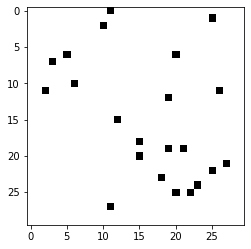

In [85]:
plt.imshow(cv2.bitwise_not(cv2.bitwise_xor(img2.img, img1.img, mask = None),None),cmap='Greys_r' )